In [101]:
# Define the identifiers for body and hand parts
BODY_IDENTIFIERS = [
    "nose",
    "neck",
    "rightEye",
    "leftEye",
    "rightEar",
    "leftEar",
    "rightShoulder",
    "leftShoulder",
    "rightElbow",
    "leftElbow",
    "rightWrist",
    "leftWrist"
]

HAND_IDENTIFIERS = [
    "wrist",
    "indexTip",
    "indexDIP",
    "indexPIP",
    "indexMCP",
    "middleTip",
    "middleDIP",
    "middlePIP",
    "middleMCP",
    "ringTip",
    "ringDIP",
    "ringPIP",
    "ringMCP",
    "littleTip",
    "littleDIP",
    "littlePIP",
    "littleMCP",
    "thumbTip",
    "thumbIP",
    "thumbMP",
    "thumbCMC"
]

HAND_IDENTIFIERS = [id + "_0" for id in HAND_IDENTIFIERS] + [id + "_1" for id in HAND_IDENTIFIERS]

# Original dataset distrbution 

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

WLASL100_train = pd.read_csv('D:\Spoter_transformer_SLR\datasets\WLASL100_train_25fps.csv')
WLASL100_test = pd.read_csv('D:\Spoter_transformer_SLR\datasets\WLASL100_test_25fps.csv')
WLASL100_val = pd.read_csv('D:\Spoter_transformer_SLR\datasets\WLASL100_val_25fps.csv')

WLASL100 = pd.concat([WLASL100_train, WLASL100_test, WLASL100_val], ignore_index=True)
WLASL100_tmp = WLASL100

Class=61, n=19 (0.933%)
Class=95, n=18 (0.884%)
Class=59, n=19 (0.933%)
Class=92, n=18 (0.884%)
Class=66, n=19 (0.933%)
Class=50, n=20 (0.982%)
Class=68, n=19 (0.933%)
Class=57, n=19 (0.933%)
Class=32, n=20 (0.982%)
Class=35, n=20 (0.982%)
Class=69, n=19 (0.933%)
Class=56, n=19 (0.933%)
Class=51, n=19 (0.933%)
Class=58, n=19 (0.933%)
Class=67, n=19 (0.933%)
Class=93, n=18 (0.884%)
Class=94, n=18 (0.884%)
Class=60, n=19 (0.933%)
Class=34, n=20 (0.982%)
Class=33, n=20 (0.982%)
Class=20, n=21 (1.031%)
Class=18, n=21 (1.031%)
Class=27, n=21 (1.031%)
Class=9, n=23 (1.129%)
Class=0, n=40 (1.964%)
Class=11, n=22 (1.080%)
Class=7, n=25 (1.227%)
Class=29, n=21 (1.031%)
Class=16, n=22 (1.080%)
Class=42, n=20 (0.982%)
Class=89, n=18 (0.884%)
Class=45, n=20 (0.982%)
Class=73, n=19 (0.933%)
Class=87, n=18 (0.884%)
Class=80, n=18 (0.884%)
Class=74, n=19 (0.933%)
Class=6, n=25 (1.227%)
Class=28, n=21 (1.031%)
Class=17, n=22 (1.080%)
Class=1, n=35 (1.718%)
Class=10, n=23 (1.129%)
Class=19, n=21 (1.031

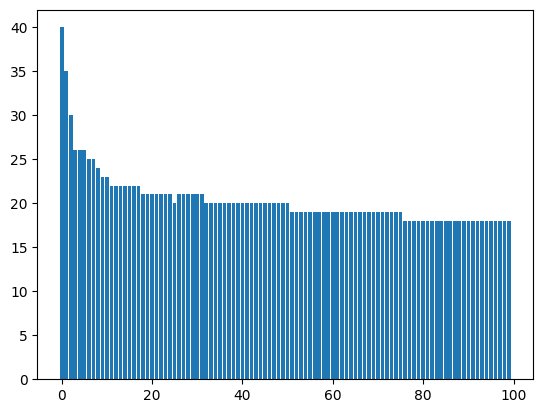

In [79]:
from collections import Counter
 
y = WLASL100_tmp['labels'].to_list()
X = WLASL100_tmp.drop('labels', axis=1)

counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.show()

# Unsampling by removing

In [146]:
# Load your CSV dataset
dataset = WLASL100

# Find the minimum number of samples for a class
min_samples = dataset['labels'].value_counts().min()

# Create a balanced dataset by undersampling
balanced_dataset = dataset.groupby('labels').apply(lambda x: x.sample(min_samples)).reset_index(drop=True)

# Oversampling by duplicating

In [111]:
import pandas as pd
from sklearn.utils import resample

# Load your CSV file into a DataFrame
df = WLASL100_tmp

# Assuming 'labels' is the column containing class labels
class_labels = df['labels'].unique()

# Find the class with the maximum number of samples
max_samples = df['labels'].value_counts().max()

# Create an empty DataFrame to store the balanced dataset
balanced_df = pd.DataFrame()

# Iterate through each class and balance the samples
for label in class_labels:
    # Extract samples for the current class
    class_samples = df[df['labels'] == label]
    
    # If the class has fewer samples than the maximum, oversample to match the maximum
    if len(class_samples) < max_samples:
        oversampled_class = resample(class_samples, replace=True, n_samples=max_samples, random_state=42)
        balanced_df = pd.concat([balanced_df, oversampled_class])
    # If the class has the same number of samples as the maximum, keep it as is
    else:
        balanced_df = pd.concat([balanced_df, class_samples])

# Save the balanced DataFrame to a new CSV file

# Oversampling by SMOTE

## Unify the number of frames for each data 

In [150]:
#Extract lables and feature data 
DROP_COL_LIST = ['labels', 'video_size_width', 'video_fps', 'video_size_height']
DROP_COL_ditc = {'video_size_width': 1920, 'video_size_height': 1080, 'video_fps': 60}

y = WLASL100_tmp['labels'].to_list()
X = WLASL100_tmp.drop(DROP_COL_LIST, axis=1)

# Find the max number of frame
max_frame_num = -1
min_frame_num = 99999
for row_idex in range(len(X)):
    row = X.iloc[row_idex]
    for column in X.columns:
        data = ast.literal_eval(row[column])
        if len(data) > max_frame_num:
            max_frame_num = len(data)
        
        if len(data) < min_frame_num:
            min_frame_num = len(data)

print("min_frame_num: " + str(min_frame_num))
print("max_frame_num: " + str(max_frame_num))

# Unify the number of frame based on the max number of frame
for row_idex in range(len(X)):
    for column in X.columns:
        X.iloc[row_idex][column] = ast.literal_eval(X.iloc[row_idex][column])
        while len(X.iloc[row_idex][column]) != max_frame_num:
            X.iloc[row_idex][column].append(0)

# Check if the data is of the same size
for row_idex in range(len(X)):
    for column in X.columns:
        data = X.iloc[row_idex][column]
        if len(data) != max_frame_num:
            print("Problem")
            
# Record the column names 
column_names = X.columns
print(len(X))
X.head(1)

min_frame_num: 11
max_frame_num: 204
2037


,indexPIP_left_X,leftElbow_Y,ringPIP_left_Y,thumbMP_left_X,ringDIP_right_X,leftEye_Y,indexPIP_right_Y,littleMCP_right_X,middleDIP_left_X,ringPIP_left_X,...,littlePIP_left_Y,leftShoulder_X,middleTip_right_X,thumbTip_right_Y,thumbIP_right_X,nose_X,rightElbow_Y,littleDIP_left_Y,ringPIP_right_Y,ringMCP_left_X
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.132656, 0.132542, 0.132542, 0.132542, 0.132...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.45282, ...","[0.669441, 0.67081, 0.67081, 0.67081, 0.67081,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.446443,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.416879,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.709275, 0.707484, 0.707484, 0.707484, 0.707...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.461334,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.441012,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.371093,...","[0.540267, 0.538522, 0.538522, 0.538522, 0.538...","[0.126503, 0.190784, 0.190784, 0.190784, 0.190...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.417336,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [151]:
import numpy as np
X_same_size = X
X_list = []

# Combined columns as a single column 
for row_idex in range(len(X_same_size)):
    combined_features_list = []
    for column in X_same_size.columns:
        for value in X_same_size.iloc[row_idex][column]:
            combined_features_list.append(value)
    X_list.append(combined_features_list)

# Convert data frame to array that can be used by SMOTE()
X_array = np.array(X_list)

In [152]:
from imblearn.over_sampling import SMOTE

# Oversample the dataset 
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X_array, y)

Class=61, n=40 (1.000%)
Class=95, n=40 (1.000%)
Class=59, n=40 (1.000%)
Class=92, n=40 (1.000%)
Class=66, n=40 (1.000%)
Class=50, n=40 (1.000%)
Class=68, n=40 (1.000%)
Class=57, n=40 (1.000%)
Class=32, n=40 (1.000%)
Class=35, n=40 (1.000%)
Class=69, n=40 (1.000%)
Class=56, n=40 (1.000%)
Class=51, n=40 (1.000%)
Class=58, n=40 (1.000%)
Class=67, n=40 (1.000%)
Class=93, n=40 (1.000%)
Class=94, n=40 (1.000%)
Class=60, n=40 (1.000%)
Class=34, n=40 (1.000%)
Class=33, n=40 (1.000%)
Class=20, n=40 (1.000%)
Class=18, n=40 (1.000%)
Class=27, n=40 (1.000%)
Class=9, n=40 (1.000%)
Class=0, n=40 (1.000%)
Class=11, n=40 (1.000%)
Class=7, n=40 (1.000%)
Class=29, n=40 (1.000%)
Class=16, n=40 (1.000%)
Class=42, n=40 (1.000%)
Class=89, n=40 (1.000%)
Class=45, n=40 (1.000%)
Class=73, n=40 (1.000%)
Class=87, n=40 (1.000%)
Class=80, n=40 (1.000%)
Class=74, n=40 (1.000%)
Class=6, n=40 (1.000%)
Class=28, n=40 (1.000%)
Class=17, n=40 (1.000%)
Class=1, n=40 (1.000%)
Class=10, n=40 (1.000%)
Class=19, n=40 (1.000

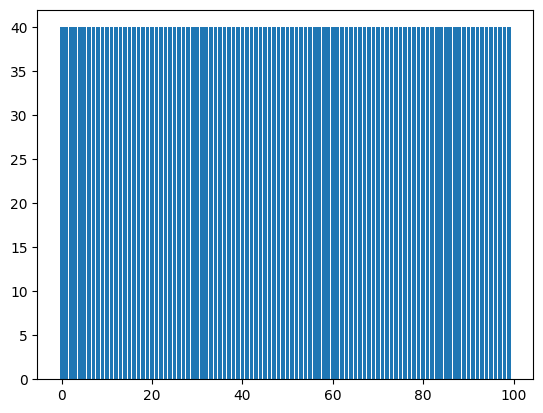

In [157]:
# summarize distribution
counter = Counter(y_oversample)
for k,v in counter.items():
	per = v / len(y_oversample) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## Convert back as dataframe 

In [159]:
max_frame_num

204

In [212]:
df = pd.DataFrame()
column_names = X.columns.tolist()
DROP_COL_dict = {'video_size_width': 1920, 'video_size_height': 1080, 'video_fps': 60}

for row_idx in range(len(X_oversample)):
    row = [X_oversample[row_idx][i:i+max_frame_num] for i in range(0, len(X_oversample[row_idx]), max_frame_num)]
    data_dict = {column_names[i]: str(row[i].tolist()) for i in range(len(column_names))}
    data_dict['labels'] = y_oversample[row_idx]
    data_dict.update(DROP_COL_dict)
    df = df.append(data_dict, ignore_index=True)


In [213]:
df

,indexDIP_left_X,indexDIP_left_Y,indexDIP_right_X,indexDIP_right_Y,indexMCP_left_X,indexMCP_left_Y,indexMCP_right_X,indexMCP_right_Y,indexPIP_left_X,indexPIP_left_Y,...,thumbTip_left_Y,thumbTip_right_X,thumbTip_right_Y,video_fps,video_size_height,video_size_width,wrist_left_X,wrist_left_Y,wrist_right_X,wrist_right_Y
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",60.0,1080.0,1920.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.491945, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00961185...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.489529, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0242416,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.499502, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0129666,...",60.0,1080.0,1920.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.416323, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0547718,..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.460083, 0.476235, 0.488...","[0.0, 0.0, 0.0, 0.0, 0.0155984, 0.365601, 0.51...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.482065, 0.431651, 0.438...","[0.0, 0.0, 0.0, 0.0, 0.0620741, 0.245967, 0.42...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.486978, 0.488128, 0.450...","[0.0, 0.0, 0.0, 0.0, 0.0529512, 0.357034, 0.47...",60.0,1080.0,1920.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.455429, 0.447068, 0.453...","[0.0, 0.0, 0.0, 0.0, 0.0122632, 0.150775, 0.28..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.464334, 0.463796, 0.464334, 0.463489, 0.462...","[0.71861, 0.718308, 0.71861, 0.71771, 0.717292...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.441195, 0.441022, 0.441195, 0.4412, 0.44090...","[0.676843, 0.677087, 0.676843, 0.677599, 0.677...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.45646, 0.455358, 0.45646, 0.4543, 0.453841,...","[0.696445, 0.697442, 0.696445, 0.69736, 0.6979...",60.0,1080.0,1920.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.438319, 0.438524, 0.438319, 0.439192, 0.439...","[0.552631, 0.5527, 0.552631, 0.553286, 0.55340..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [214]:
df.to_csv(r"D:\Spoter_transformer_SLR\datasets\oversample\balanced_WLASL100_SMOTE.csv", index=False)

In [215]:
new = pd.read_csv(r"D:\Spoter_transformer_SLR\datasets\oversample\balanced_WLASL100_SMOTE.csv")

In [216]:
new

,indexDIP_left_X,indexDIP_left_Y,indexDIP_right_X,indexDIP_right_Y,indexMCP_left_X,indexMCP_left_Y,indexMCP_right_X,indexMCP_right_Y,indexPIP_left_X,indexPIP_left_Y,...,thumbTip_left_Y,thumbTip_right_X,thumbTip_right_Y,video_fps,video_size_height,video_size_width,wrist_left_X,wrist_left_Y,wrist_right_X,wrist_right_Y
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",60,1080,1920,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.491945, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00961185...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.489529, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0242416,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.499502, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0129666,...",60,1080,1920,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.416323, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0547718,..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.460083, 0.476235, 0.488...","[0.0, 0.0, 0.0, 0.0, 0.0155984, 0.365601, 0.51...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.482065, 0.431651, 0.438...","[0.0, 0.0, 0.0, 0.0, 0.0620741, 0.245967, 0.42...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.486978, 0.488128, 0.450...","[0.0, 0.0, 0.0, 0.0, 0.0529512, 0.357034, 0.47...",60,1080,1920,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.455429, 0.447068, 0.453...","[0.0, 0.0, 0.0, 0.0, 0.0122632, 0.150775, 0.28..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.464334, 0.463796, 0.464334, 0.463489, 0.462...","[0.71861, 0.718308, 0.71861, 0.71771, 0.717292...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.441195, 0.441022, 0.441195, 0.4412, 0.44090...","[0.676843, 0.677087, 0.676843, 0.677599, 0.677...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.45646, 0.455358, 0.45646, 0.4543, 0.453841,...","[0.696445, 0.697442, 0.696445, 0.69736, 0.6979...",60,1080,1920,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.438319, 0.438524, 0.438319, 0.439192, 0.439...","[0.552631, 0.5527, 0.552631, 0.553286, 0.55340..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0,